<a href="https://colab.research.google.com/github/JosePabloGFnl/Vision-Computacional/blob/main/Ejercicio%205/Ejercicio5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

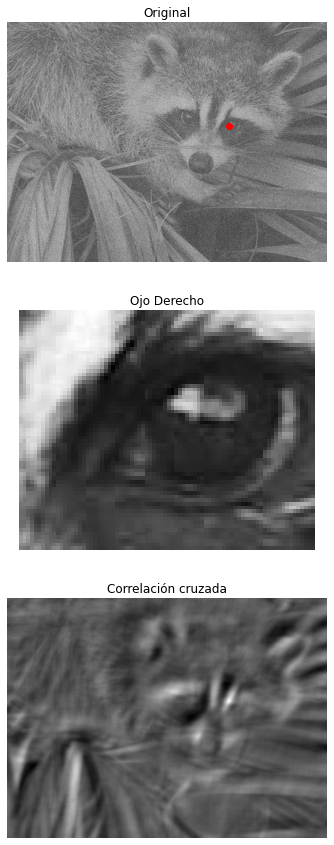

In [1]:
# Correlacion de imágenes
from scipy import signal
from scipy import misc
import numpy as np
import cv2
from matplotlib import pyplot as plt

#Cargamos la imagen
rng = np.random.default_rng() 
face = misc.face(gray=True) - misc.face(gray=True).mean()

#Coordenadas del ojo derecho
template = np.copy(face[300:365, 670:750])  
template -= template.mean()

#Añadimos ruido
face = face + rng.standard_normal(face.shape) * 50  
corr = signal.correlate2d(face, template, boundary='symm', mode='same')

#Buscamos alguna coincidencia
y, x = np.unravel_index(np.argmax(corr), corr.shape)  

#Imprimimos las comparaciones
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1, figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Ojo Derecho')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Correlación cruzada')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
plt.show()